In [1]:
import pandas as pd
from descargar_imagenes_clases import euvi_downloader
from descargar_imagenes_clases import aia_downloader
import sunpy.map
import sunpy.data.sample 
from descargar_imagenes_clases import initial_final_time
import astropy.units as u
from astropy.io import fits
from sunpy.net import Fido, attrs as a
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import pdb
import numpy as np
import requests
import warnings
warnings.filterwarnings("ignore")
# Specify the file path
file_path = "/data_local/Descargas/DatesandTimesCMEs-SRcharacteristics.csv"

# Read the CSV file
data = pd.read_csv(file_path)

# Display the data
#print(data)

In [2]:
#asd=data.iloc[0:13]['EUV loops data start time']
data_short = data.iloc[0:18].copy()
data_short['EUV loops data start time'] #= pd.to_datetime(data_short['EUV loops data start time'])

0      2010/12/12 1:00:00
1     2010/12/14 14:50:00
2        2011/03/17 10:00
3      2011/06/05 3:00:00
4     2013/01/23 12:00:00
5      2013/01/29 0:00:00
6      2013/02/09 5:00:00
7      2013/04/24 4:00:00
8      2013/05/02 4:00:00
9     2013/05/17 18:00:00
10    2013/05/27 16:00:00
11    2013/06/07 22:00:00
12     No sirve, stealth 
13     2011/04/27 5:00:00
14     2011/05/23 0:00:00
15     2013/01/16 5:00:00
16    2013/01/23 18:00:00
17     2013/01/27 5:00:00
Name: EUV loops data start time, dtype: object

In [3]:
data2=data_short[['Instrument','EUV loops data start time','EUV loops data end time']].copy()
data2

,Instrument,EUV loops data start time,EUV loops data end time
0,AIA,2010/12/12 1:00:00,2010/12/12 15:00:00
1,EUVI-A,2010/12/14 14:50:00,2010/12/14 23:59:00
2,EUVI-B,2011/03/17 10:00,2011/03/17 22:00
3,AIA,2011/06/05 3:00:00,2011/06/05 16:00:00
4,AIA,2013/01/23 12:00:00,2013/01/23 20:00:00
5,AIA,2013/01/29 0:00:00,2013/01/29 8:00:00
6,AIA,2013/02/09 5:00:00,2013/02/09 12:00:00
7,EUVI-B,2013/04/24 4:00:00,2013/04/24 18:00:00
8,AIA,2013/05/02 4:00:00,2013/05/02 12:00:00
9,EUVI-B,2013/05/17 18:00:00,2013/05/18 10:00:00


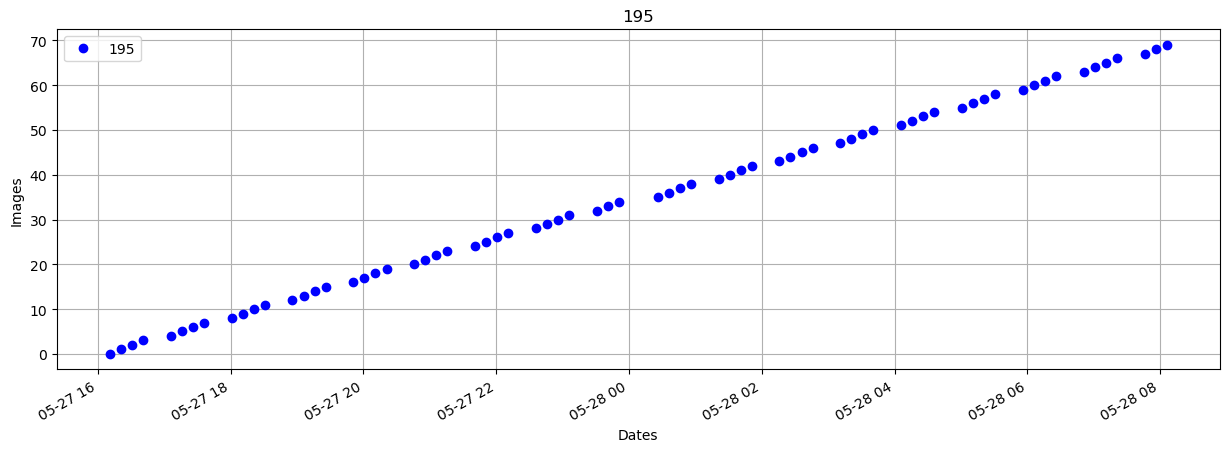

In [4]:
#EUVI
#index = 2
#index = 7
#index = 9 #??
index = 10
nave='STEREO_B'
ini=data2.iloc[index]['EUV loops data start time'].replace('/', '-')
fin=data2.iloc[index]['EUV loops data end time'].replace('/', '-')
t_ini=ini
t_fin=fin
ini,fin = initial_final_time(t_ini, t_fin, delta_t=10)
euvi_images = euvi_downloader(start_time=ini,end_time=fin,nave=nave,cadence=1.1,wave=195,origin_download_path=True,band_folder=True)
euvi_images.search()
euvi_images.display()

In [5]:
euvi_images.download()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_161030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_161030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_162030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_162030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_163030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_163030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_164030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_164030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_170530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_170530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter


20130527_171530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_171530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_172530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_172530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_173530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_173530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_180030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_180030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_181030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_181030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_182030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_182030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


20130527_183030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_183030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_185530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_185530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_190530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_190530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_191530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_191530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_192530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_192530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_195030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_195030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_200030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_200030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_201030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_201030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_202030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_202030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_204530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_204530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_205530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_205530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_210530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_210530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_211530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_211530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_214030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_214030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_215030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_215030_n4euB.fts


Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_220030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_220030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_221030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_221030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_223530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_223530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_224530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_224530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_225530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_225530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_230530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_230530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_233030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_233030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_234030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_234030_n4euB.fts


Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130527_235030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130527/195/20130527_235030_n4euB.fts
Se ha creado el directorio /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_002530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_002530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_003530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_003530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_004530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_004530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_005530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_005530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_012030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_012030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_013030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_013030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_014030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_014030_n4euB.fts


Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_015030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_015030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_021530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_021530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_022530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_022530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_023530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_023530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_024530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_024530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_031030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_031030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_032030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_032030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_033030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_033030_n4euB.fts


Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_034030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_034030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_040530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_040530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_041530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_041530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_042530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_042530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_043530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_043530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_050030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_050030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_051030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_051030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_052030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_052030_n4euB.fts


Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_053030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_053030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_055530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_055530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_060530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_060530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_061530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_061530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_062530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_062530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_065030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_065030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_070030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_070030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_071030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_071030_n4euB.fts


Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f25773fa170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_072030_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_072030_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_074530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_074530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_075530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_075530_n4euB.fts


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20130528_080530_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Downloaded: /media/gehme/gehme/data/stereo/secchi/L0/b/img/euvi/20130528/195/20130528_080530_n4euB.fts
